In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [25]:
NUM_CLASSES = 12

# Dataset reading

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,202 (4.70 KB)

 Trainable params: 1,202 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


35/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0984 - loss: 2.5660   
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1061 - loss: 2.5332 - val_accuracy: 0.1753 - val_loss: 2.3341
Epoch 2/1000
39/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1575 - loss: 2.3683 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1609 - loss: 2.3581 - val_accuracy: 0.2448 - val_loss: 2.2180
Epoch 3/1000
40/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2015 - loss: 2.2767   
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2022 - loss: 2.2704 - val_accuracy: 0.3126 - val_loss: 2.1126
Epoch 4/1000
40/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2154 - loss: 2.2099 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2196 - loss: 2.1997 - val_accuracy: 0.3266 - val_loss: 1.9932
Epoch 5/1000
44/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2400 - loss: 2.1136 
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2437 - loss: 2.1035 - val_accuracy: 0.3654 - val_loss: 1.8683
Epoch 6/1000
29/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2732 - loss: 2.0234  
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2784 - loss: 2.0074 - val_accuracy: 0.3898 - val_loss: 1.7501
Epoch 7/1000
42/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2845 - loss: 1.9392 
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2902 - loss: 1.9295 - val_accuracy: 0.5295 - val_loss: 1.6403
Epoch 8/1000
43/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3401 - loss: 1.8389 
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3401 - loss: 1.8371 - val_accuracy: 0.5791 - val_loss: 1.5311
Epoch 9/1000
40/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3604 - loss: 1.7808 
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3595 - loss: 1.7751 - val_accuracy: 0.6133 - val_loss: 1.4403
Epoch 10/1000
44/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3651 - loss: 1.7246 
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3664 - loss: 1.7201 - val_accuracy: 0.6249 - val_loss: 1.3569
Epoch 11/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3946 - loss: 1.6618 
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3957 - loss: 1.6610 - val_accuracy: 0.6385 - val_loss: 1.2847
Epoch 12/1000
50/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4024 - loss: 1.6292 
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4027 - loss: 1.6258 - val_accuracy: 0.6528 - val_loss: 1.2490
Epoch 13/1000
54/61 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.4114 - loss: 1.5953
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4133 - loss: 1.5919 - val_accuracy: 0.6885 - val_loss: 1.1911
Epoch 14/1000
48/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4391 - loss: 1.5336 
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4399 - loss: 1.5325 - val_accuracy: 0.7056 - val_loss: 1.1433
Epoch 15/1000
46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4496 - loss: 1.5078 
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4505 - loss: 1.5098 - val_accuracy: 0.7335 - val_loss: 1.1193
Epoch 16/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4572 - loss: 1.5027 
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4588 - loss: 1.4988 - val_accuracy: 0.7603 - val_loss: 1.0820
Epoch 17/1000
39/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4823 - loss: 1.4517 
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4798 - loss: 1.4531 - val_accuracy: 0.7545 - val_loss: 1.0459
Epoch 18/1000
37/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4691 - loss: 1.4487 
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4740 - loss: 1.4428 - val_accuracy: 0.7789 - val_loss: 1.0147
Epoch 19/1000
48/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4971 - loss: 1.4414 
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4957 - loss: 1.4399 - val_accuracy: 0.7843 - val_loss: 1.0026
Epoch 20/1000
48/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4892 - loss: 1.4234 
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4906 - loss: 1.4196 - val_accuracy: 0.7952 - val_loss: 0.9779
Epoch 21/1000
46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5079 - loss: 1.3916 
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5072 - loss: 1.3904 - val_accuracy: 0.8068 - val_loss: 0.9586
Epoch 22/1000
48/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4993 - loss: 1.3957 
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 1.3923 - val_accuracy: 0.8130 - val_loss: 0.9230
Epoch 23/1000
45/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5014 - loss: 1.3947 
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5046 - loss: 1.3901 - val_accuracy: 0.8142 - val_loss: 0.9098
Epoch 24/1000
46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5314 - loss: 1.3160 
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5285 - loss: 1.3230 - val_accuracy: 0.8189 - val_loss: 0.8898
Epoch 25/1000
33/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5247 - loss: 1.3369 
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5217 - loss: 1.3445 - val_accuracy: 0.8181 - val_loss: 0.8745
Epoch 26/1000
53/61 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.5267 - loss: 1.3286
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5269 - loss: 1.3285 - val_accuracy: 0.8235 - val_loss: 0.8637
Epoch 27/1000
31/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5296 - loss: 1.3197 
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5298 - loss: 1.3162 - val_accuracy: 0.8289 - val_loss: 0.8479
Epoch 28/1000
48/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5266 - loss: 1.2970 
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5268 - loss: 1.2998 - val_accuracy: 0.8382 - val_loss: 0.8293
Epoch 29/1000
44/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5464 - loss: 1.2689 
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5453 - loss: 1.2727 - val_accuracy: 0.8251 - val_loss: 0.8146
Epoch 30/1000
54/61 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.5320 - loss: 1.3165
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5328 - loss: 1.3152 - val_accuracy: 0.8355 - val_loss: 0.8046
Epoch 31/1000
45/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5361 - loss: 1.2829 
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5377 - loss: 1.2807 - val_accuracy: 0.8456 - val_loss: 0.7928
Epoch 32/1000
39/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5438 - loss: 1.2809 
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5418 - loss: 1.2824 - val_accuracy: 0.8355 - val_loss: 0.7916
Epoch 33/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5373 - loss: 1.2684 
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5400 - loss: 1.2657 - val_accuracy: 0.8336 - val_loss: 0.7651
Epoch 34/1000
42/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5571 - loss: 1.2387 
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5594 - loss: 1.2369 - val_accuracy: 0.8522 - val_loss: 0.7490
Epoch 35/1000
46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5593 - loss: 1.2490 
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5592 - loss: 1.2507 - val_accuracy: 0.8592 - val_loss: 0.7404
Epoch 36/1000
45/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5662 - loss: 1.2287 
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5643 - loss: 1.2313 - val_accuracy: 0.8607 - val_loss: 0.7372
Epoch 37/1000
53/61 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.5558 - loss: 1.2330
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5565 - loss: 1.2330 - val_accuracy: 0.8487 - val_loss: 0.7300
Epoch 38/1000
44/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5873 - loss: 1.2016 
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5833 - loss: 1.2052 - val_accuracy: 0.8576 - val_loss: 0.7203
Epoch 39/1000
51/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5738 - loss: 1.2138 
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5736 - loss: 1.2132 - val_accuracy: 0.8654 - val_loss: 0.7012
Epoch 40/1000
52/61 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.5604 - loss: 1.2285
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5621 - loss: 1.2260 - val_accuracy: 0.8650 - val_loss: 0.6943
Epoch 41/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5792 - loss: 1.1905 
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5773 - loss: 1.1926 - val_accuracy: 0.8607 - val_loss: 0.6803
Epoch 42/1000
55/61 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.5883 - loss: 1.1812
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5873 - loss: 1.1826 - val_accuracy: 0.8642 - val_loss: 0.6745
Epoch 43/1000
46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5783 - loss: 1.1982 
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5789 - loss: 1.1961 - val_accuracy: 0.8600 - val_loss: 0.6725
Epoch 44/1000
40/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5825 - loss: 1.1575  
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5813 - loss: 1.1638 - val_accuracy: 0.8600 - val_loss: 0.6742
Epoch 45/1000
48/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5599 - loss: 1.1957 
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5629 - loss: 1.1938 - val_accuracy: 0.8662 - val_loss: 0.6611
Epoch 46/1000
42/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5895 - loss: 1.1727 
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5895 - loss: 1.1733 - val_accuracy: 0.8646 - val_loss: 0.6546
Epoch 47/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5882 - loss: 1.1758 
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5875 - loss: 1.1735 - val_accuracy: 0.8693 - val_loss: 0.6437
Epoch 48/1000
44/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5952 - loss: 1.1473 
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5950 - loss: 1.1482 - val_accuracy: 0.8747 - val_loss: 0.6289
Epoch 49/1000
56/61 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.5828 - loss: 1.1674
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5840 - loss: 1.1661 - val_accuracy: 0.8739 - val_loss: 0.6323
Epoch 50/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5912 - loss: 1.1676 
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5927 - loss: 1.1661 - val_accuracy: 0.8739 - val_loss: 0.6223
Epoch 51/1000
45/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5967 - loss: 1.1256 
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5955 - loss: 1.1300 - val_accuracy: 0.8704 - val_loss: 0.6230
Epoch 52/1000
44/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5923 - loss: 1.1712 
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5924 - loss: 1.1652 - val_accuracy: 0.8658 - val_loss: 0.6212
Epoch 53/1000
46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5982 - loss: 1.1329 
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5984 - loss: 1.1335 - val_accuracy: 0.8704 - val_loss: 0.6158
Epoch 54/1000
52/61 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.6028 - loss: 1.1427
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6029 - loss: 1.1411 - val_accuracy: 0.8782 - val_loss: 0.5973
Epoch 55/1000
45/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6120 - loss: 1.1060 
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6083 - loss: 1.1114 - val_accuracy: 0.8689 - val_loss: 0.6098
Epoch 56/1000
55/61 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.6020 - loss: 1.1278
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6009 - loss: 1.1297 - val_accuracy: 0.8716 - val_loss: 0.6060
Epoch 57/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6033 - loss: 1.1346 
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6037 - loss: 1.1304 - val_accuracy: 0.8704 - val_loss: 0.5976
Epoch 58/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6039 - loss: 1.1226 
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6030 - loss: 1.1240 - val_accuracy: 0.8677 - val_loss: 0.5962
Epoch 59/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6018 - loss: 1.1333 
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6027 - loss: 1.1288 - val_accuracy: 0.8732 - val_loss: 0.5885
Epoch 60/1000
43/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5974 - loss: 1.1267 
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5976 - loss: 1.1247 - val_accuracy: 0.8755 - val_loss: 0.5849
Epoch 61/1000
56/61 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.5845 - loss: 1.1254
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5853 - loss: 1.1247 - val_accuracy: 0.8751 - val_loss: 0.5777
Epoch 62/1000
52/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6042 - loss: 1.1131
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6049 - loss: 1.1123 - val_accuracy: 0.8774 - val_loss: 0.5815
Epoch 63/1000
46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6107 - loss: 1.0859 
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6096 - loss: 1.0887 - val_accuracy: 0.8743 - val_loss: 0.5707
Epoch 64/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5943 - loss: 1.1288 
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5962 - loss: 1.1250 - val_accuracy: 0.8798 - val_loss: 0.5691
Epoch 65/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6086 - loss: 1.1103 
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6093 - loss: 1.1086 - val_accuracy: 0.8840 - val_loss: 0.5620
Epoch 66/1000
46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6156 - loss: 1.0817 
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6154 - loss: 1.0829 - val_accuracy: 0.8875 - val_loss: 0.5522
Epoch 67/1000
46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5965 - loss: 1.1199 
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5983 - loss: 1.1188 - val_accuracy: 0.8848 - val_loss: 0.5797
Epoch 68/1000
57/61 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.6208 - loss: 1.0881
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6206 - loss: 1.0884 - val_accuracy: 0.8774 - val_loss: 0.5752
Epoch 69/1000
46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6145 - loss: 1.0907 
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6135 - loss: 1.0941 - val_accuracy: 0.8817 - val_loss: 0.5591
Epoch 70/1000
49/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6025 - loss: 1.1086 
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6041 - loss: 1.1057 - val_accuracy: 0.8825 - val_loss: 0.5563
Epoch 71/1000
54/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6120 - loss: 1.1027
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6123 - loss: 1.1022 - val_accuracy: 0.8794 - val_loss: 0.5623
Epoch 72/1000
43/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6162 - loss: 1.0985 
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6143 - loss: 1.1010 - val_accuracy: 0.8813 - val_loss: 0.5483
Epoch 73/1000
53/61 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.6097 - loss: 1.1117
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6109 - loss: 1.1071 - val_accuracy: 0.8821 - val_loss: 0.5386
Epoch 74/1000
46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6086 - loss: 1.0802 
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6091 - loss: 1.0814 - val_accuracy: 0.8852 - val_loss: 0.5476
Epoch 75/1000
37/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6304 - loss: 1.0490 
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6269 - loss: 1.0592 - val_accuracy: 0.8832 - val_loss: 0.5526
Epoch 76/1000
50/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6304 - loss: 1.0744 
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6294 - loss: 1.0736 - val_accuracy: 0.8879 - val_loss: 0.5391
Epoch 77/1000
44/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6331 - loss: 1.0607 
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6316 - loss: 1.0617 - val_accuracy: 0.8906 - val_loss: 0.5401
Epoch 78/1000
48/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6244 - loss: 1.0554 
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6238 - loss: 1.0565 - val_accuracy: 0.8829 - val_loss: 0.5488
Epoch 79/1000
48/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6280 - loss: 1.0624 
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6275 - loss: 1.0633 - val_accuracy: 0.8840 - val_loss: 0.5359
Epoch 80/1000
46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6343 - loss: 1.0410 
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6313 - loss: 1.0468 - val_accuracy: 0.8817 - val_loss: 0.5474
Epoch 81/1000
45/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6221 - loss: 1.0568 
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6207 - loss: 1.0609 - val_accuracy: 0.8875 - val_loss: 0.5337
Epoch 82/1000
48/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6395 - loss: 1.0327 
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6365 - loss: 1.0390 - val_accuracy: 0.8821 - val_loss: 0.5408
Epoch 83/1000
41/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6358 - loss: 1.0272 
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6337 - loss: 1.0342 - val_accuracy: 0.8860 - val_loss: 0.5353
Epoch 84/1000
49/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6317 - loss: 1.0272 
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6310 - loss: 1.0312 - val_accuracy: 0.8902 - val_loss: 0.5229
Epoch 85/1000
48/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6208 - loss: 1.0713 
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6228 - loss: 1.0670 - val_accuracy: 0.8798 - val_loss: 0.5299
Epoch 86/1000
44/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6168 - loss: 1.0584 
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6185 - loss: 1.0597 - val_accuracy: 0.8825 - val_loss: 0.5345
Epoch 87/1000
25/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6061 - loss: 1.0822   
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6124 - loss: 1.0745 - val_accuracy: 0.8825 - val_loss: 0.5358
Epoch 88/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6290 - loss: 1.0369 
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6286 - loss: 1.0392 - val_accuracy: 0.8898 - val_loss: 0.5226
Epoch 89/1000
38/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6364 - loss: 1.0529 
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6370 - loss: 1.0473 - val_accuracy: 0.8825 - val_loss: 0.5270
Epoch 90/1000
44/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6169 - loss: 1.0670 
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6193 - loss: 1.0612 - val_accuracy: 0.8755 - val_loss: 0.5311
Epoch 91/1000
49/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6215 - loss: 1.0717 
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6223 - loss: 1.0691 - val_accuracy: 0.8782 - val_loss: 0.5325
Epoch 92/1000
51/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6178 - loss: 1.0629 
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6185 - loss: 1.0616 - val_accuracy: 0.8817 - val_loss: 0.5236
Epoch 93/1000
52/61 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.6253 - loss: 1.0477
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6259 - loss: 1.0474 - val_accuracy: 0.8786 - val_loss: 0.5388
Epoch 94/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6357 - loss: 1.0445 
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6346 - loss: 1.0450 - val_accuracy: 0.8813 - val_loss: 0.5278
Epoch 95/1000
37/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6233 - loss: 1.0462 
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6237 - loss: 1.0489 - val_accuracy: 0.8763 - val_loss: 0.5390
Epoch 96/1000
41/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6278 - loss: 1.0499 
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6275 - loss: 1.0511 - val_accuracy: 0.8848 - val_loss: 0.5249
Epoch 97/1000
39/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6278 - loss: 1.0644 
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6294 - loss: 1.0586 - val_accuracy: 0.8832 - val_loss: 0.5246
Epoch 98/1000
45/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6332 - loss: 1.0356 
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6322 - loss: 1.0379 - val_accuracy: 0.8840 - val_loss: 0.5335
Epoch 99/1000
48/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6311 - loss: 1.0425 
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6320 - loss: 1.0418 - val_accuracy: 0.8813 - val_loss: 0.5268
Epoch 100/1000
52/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6358 - loss: 1.0315 
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6355 - loss: 1.0327 - val_accuracy: 0.8856 - val_loss: 0.5201
Epoch 101/1000
42/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6287 - loss: 1.0428 
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6296 - loss: 1.0419 - val_accuracy: 0.8898 - val_loss: 0.5182
Epoch 102/1000
39/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6251 - loss: 1.0399 
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6270 - loss: 1.0381 - val_accuracy: 0.8817 - val_loss: 0.5316
Epoch 103/1000
53/61 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.6386 - loss: 1.0352
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6379 - loss: 1.0353 - val_accuracy: 0.8856 - val_loss: 0.5143
Epoch 104/1000
49/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6402 - loss: 1.0279 
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6394 - loss: 1.0307 - val_accuracy: 0.8860 - val_loss: 0.5138
Epoch 105/1000
53/61 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.6445 - loss: 1.0206
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6442 - loss: 1.0200 - val_accuracy: 0.8840 - val_loss: 0.5142
Epoch 106/1000
44/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6398 - loss: 1.0219 
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6389 - loss: 1.0223 - val_accuracy: 0.8887 - val_loss: 0.5123
Epoch 107/1000
42/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6263 - loss: 1.0499 
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6278 - loss: 1.0460 - val_accuracy: 0.8817 - val_loss: 0.5195
Epoch 108/1000
56/61 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.6343 - loss: 1.0411
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6338 - loss: 1.0413 - val_accuracy: 0.8867 - val_loss: 0.5230
Epoch 109/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6392 - loss: 1.0386 
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6393 - loss: 1.0373 - val_accuracy: 0.8860 - val_loss: 0.5221
Epoch 110/1000
52/61 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.6353 - loss: 1.0302
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6358 - loss: 1.0308 - val_accuracy: 0.8891 - val_loss: 0.5156
Epoch 111/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6284 - loss: 1.0293 
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6300 - loss: 1.0286 - val_accuracy: 0.8763 - val_loss: 0.5197
Epoch 112/1000
38/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6426 - loss: 1.0210 
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6411 - loss: 1.0245 - val_accuracy: 0.8863 - val_loss: 0.5130
Epoch 113/1000
35/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6444 - loss: 1.0338 
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6445 - loss: 1.0273 - val_accuracy: 0.8860 - val_loss: 0.5115
Epoch 114/1000
45/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6368 - loss: 1.0330 
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6360 - loss: 1.0357 - val_accuracy: 0.8883 - val_loss: 0.5146
Epoch 115/1000
53/61 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.6526 - loss: 1.0210
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6513 - loss: 1.0215 - val_accuracy: 0.8906 - val_loss: 0.5060
Epoch 116/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6456 - loss: 1.0059 
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6461 - loss: 1.0061 - val_accuracy: 0.8813 - val_loss: 0.5093
Epoch 117/1000
38/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6295 - loss: 1.0261 
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6330 - loss: 1.0248 - val_accuracy: 0.8825 - val_loss: 0.5127
Epoch 118/1000
49/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6282 - loss: 1.0325 
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6287 - loss: 1.0324 - val_accuracy: 0.8805 - val_loss: 0.5254
Epoch 119/1000
50/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6493 - loss: 1.0051 
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6480 - loss: 1.0070 - val_accuracy: 0.8883 - val_loss: 0.5218
Epoch 120/1000
49/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6468 - loss: 1.0080 
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6454 - loss: 1.0096 - val_accuracy: 0.8875 - val_loss: 0.5185
Epoch 121/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6435 - loss: 1.0237 
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6435 - loss: 1.0222 - val_accuracy: 0.8867 - val_loss: 0.5197
Epoch 122/1000
40/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6411 - loss: 0.9995 
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6399 - loss: 1.0050 - val_accuracy: 0.8840 - val_loss: 0.5205
Epoch 123/1000
39/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6422 - loss: 1.0590 
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6421 - loss: 1.0480 - val_accuracy: 0.8848 - val_loss: 0.5065
Epoch 124/1000
33/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6450 - loss: 1.0289 
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6430 - loss: 1.0274 - val_accuracy: 0.8879 - val_loss: 0.5224
Epoch 125/1000
42/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6441 - loss: 1.0123 
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6432 - loss: 1.0140 - val_accuracy: 0.8817 - val_loss: 0.5266
Epoch 126/1000
44/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6452 - loss: 0.9914 
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6467 - loss: 0.9951 - val_accuracy: 0.8914 - val_loss: 0.5104
Epoch 127/1000
50/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6400 - loss: 1.0225 
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6405 - loss: 1.0206 - val_accuracy: 0.8790 - val_loss: 0.5158
Epoch 128/1000
37/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6467 - loss: 1.0057 
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6440 - loss: 1.0067 - val_accuracy: 0.8906 - val_loss: 0.5039
Epoch 129/1000
52/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6249 - loss: 1.0183 
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6269 - loss: 1.0178 - val_accuracy: 0.8829 - val_loss: 0.5265
Epoch 130/1000
48/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6445 - loss: 1.0206
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6439 - loss: 1.0196 - val_accuracy: 0.8817 - val_loss: 0.5136
Epoch 131/1000
35/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6607 - loss: 1.0086 
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6594 - loss: 1.0053 - val_accuracy: 0.8875 - val_loss: 0.5160
Epoch 132/1000
43/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6640 - loss: 0.9752 
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6604 - loss: 0.9832 - val_accuracy: 0.8836 - val_loss: 0.5138
Epoch 133/1000
46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6544 - loss: 0.9974 
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6515 - loss: 1.0001 - val_accuracy: 0.8879 - val_loss: 0.5140
Epoch 134/1000
36/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6310 - loss: 1.0277 
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6306 - loss: 1.0312 - val_accuracy: 0.8848 - val_loss: 0.5179
Epoch 135/1000
46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6450 - loss: 0.9928 
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6471 - loss: 0.9924 - val_accuracy: 0.8879 - val_loss: 0.5064
Epoch 136/1000
48/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6487 - loss: 1.0073 
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6487 - loss: 1.0088 - val_accuracy: 0.8856 - val_loss: 0.5114
Epoch 137/1000
43/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6596 - loss: 0.9929 
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6567 - loss: 0.9946 - val_accuracy: 0.8821 - val_loss: 0.5104
Epoch 138/1000
31/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6589 - loss: 1.0121 
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6565 - loss: 1.0033 - val_accuracy: 0.8867 - val_loss: 0.4975
Epoch 139/1000
32/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6632 - loss: 0.9568 
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6591 - loss: 0.9684 - val_accuracy: 0.8786 - val_loss: 0.5162
Epoch 140/1000
43/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6519 - loss: 1.0271 
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6496 - loss: 1.0230 - val_accuracy: 0.8902 - val_loss: 0.5023
Epoch 141/1000
46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6487 - loss: 0.9949 
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6478 - loss: 0.9974 - val_accuracy: 0.8805 - val_loss: 0.5267
Epoch 142/1000
28/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - loss: 0.9914 
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6552 - loss: 0.9892 - val_accuracy: 0.8790 - val_loss: 0.5205
Epoch 143/1000
49/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6580 - loss: 0.9823 
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6564 - loss: 0.9854 - val_accuracy: 0.8891 - val_loss: 0.5022
Epoch 144/1000
51/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6554 - loss: 0.9918 
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6555 - loss: 0.9918 - val_accuracy: 0.8914 - val_loss: 0.4926
Epoch 145/1000
31/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6472 - loss: 1.0151 
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6481 - loss: 1.0098 - val_accuracy: 0.8922 - val_loss: 0.5054
Epoch 146/1000
47/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6559 - loss: 0.9851 
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6541 - loss: 0.9894 - val_accuracy: 0.8840 - val_loss: 0.5212
Epoch 147/1000
39/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6546 - loss: 1.0096  
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6549 - loss: 1.0021 - val_accuracy: 0.8844 - val_loss: 0.5077
Epoch 148/1000
45/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6512 - loss: 0.9980 
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6502 - loss: 0.9991 - val_accuracy: 0.8825 - val_loss: 0.5156
Epoch 149/1000
53/61 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.6525 - loss: 0.9831
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6524 - loss: 0.9824 - val_accuracy: 0.8844 - val_loss: 0.5042
Epoch 150/1000
55/61 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.6579 - loss: 0.9934
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6571 - loss: 0.9940 - val_accuracy: 0.8860 - val_loss: 0.5138
Epoch 151/1000
56/61 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.6490 - loss: 0.9939
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6490 - loss: 0.9946 - val_accuracy: 0.8867 - val_loss: 0.5016
Epoch 152/1000
55/61 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.6496 - loss: 0.9761
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6495 - loss: 0.9786 - val_accuracy: 0.8821 - val_loss: 0.5156
Epoch 153/1000
36/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6637 - loss: 0.9807   
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6604 - loss: 0.9863 - val_accuracy: 0.8829 - val_loss: 0.5150
Epoch 154/1000
44/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6557 - loss: 0.9701 
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6542 - loss: 0.9764 - val_accuracy: 0.8863 - val_loss: 0.5022
Epoch 155/1000
44/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6566 - loss: 0.9963 
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6559 - loss: 0.9999 - val_accuracy: 0.8926 - val_loss: 0.4971
Epoch 156/1000
24/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6706 - loss: 0.9603  
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6630 - loss: 0.9735 - val_accuracy: 0.8898 - val_loss: 0.5076
Epoch 157/1000
35/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6568 - loss: 0.9859 
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6544 - loss: 0.9914 - val_accuracy: 0.8832 - val_loss: 0.5175
Epoch 158/1000
35/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6468 - loss: 1.0145 
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6474 - loss: 1.0120 - val_accuracy: 0.8852 - val_loss: 0.4998
Epoch 159/1000
35/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6513 - loss: 0.9747 
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6497 - loss: 0.9905 - val_accuracy: 0.8840 - val_loss: 0.5179
Epoch 160/1000
43/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6566 - loss: 0.9669
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6574 - loss: 0.9695 - val_accuracy: 0.8883 - val_loss: 0.5056
Epoch 161/1000
37/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6546 - loss: 0.9999 
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6538 - loss: 0.9964 - val_accuracy: 0.8898 - val_loss: 0.4939
Epoch 162/1000
42/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6439 - loss: 1.0122 
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6444 - loss: 1.0132 - val_accuracy: 0.8832 - val_loss: 0.5237
Epoch 163/1000
42/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6529 - loss: 0.9670 
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6518 - loss: 0.9757 - val_accuracy: 0.8821 - val_loss: 0.5219
Epoch 164/1000
55/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6543 - loss: 0.9717
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6537 - loss: 0.9727 - val_accuracy: 0.8922 - val_loss: 0.5123
Epoch 164: early stopping


In [34]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8918 - loss: 0.5098 


In [35]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [36]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[7.3452674e-02 3.2522231e-01 4.1354340e-01 1.4435602e-03 1.8557620e-01
 5.0667762e-07 5.3828608e-09 6.1032566e-04 2.0000054e-05 6.4396045e-05
 5.3512067e-06 6.1205938e-05]
2


# Confusion matrix

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step


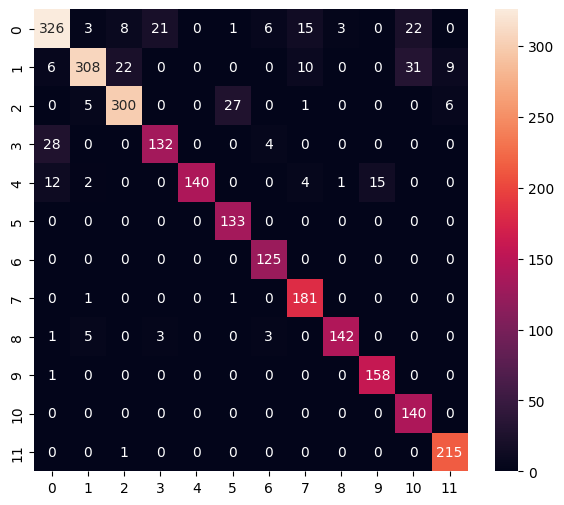

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       405
           1       0.95      0.80      0.87       386
           2       0.91      0.88      0.90       339
           3       0.85      0.80      0.82       164
           4       1.00      0.80      0.89       174
           5       0.82      1.00      0.90       133
           6       0.91      1.00      0.95       125
           7       0.86      0.99      0.92       183
           8       0.97      0.92      0.95       154
           9       0.91      0.99      0.95       159
          10       0.73      1.00      0.84       140
          11       0.93      1.00      0.96       216

    accuracy                           0.89      2578
   macro avg       0.89      0.92      0.90      2578
weighted avg       0.90      0.89      0.89      2578



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [38]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [39]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\teres\AppData\Local\Temp\tmps67qskkm\assets


INFO:tensorflow:Assets written to: C:\Users\teres\AppData\Local\Temp\tmps67qskkm\assets


Saved artifact at 'C:\Users\teres\AppData\Local\Temp\tmps67qskkm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 12), dtype=tf.float32, name=None)
Captures:
  2507056123344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2507056124880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2507056123536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2507056126032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2507056123728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2507056134864: TensorSpec(shape=(), dtype=tf.resource, name=None)


6908

# Inference test

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.3452622e-02 3.2522237e-01 4.1354337e-01 1.4435600e-03 1.8557622e-01
 5.0667853e-07 5.3828706e-09 6.1032706e-04 2.0000089e-05 6.4396045e-05
 5.3511958e-06 6.1205814e-05]
2
